## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [67]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [68]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path("./Resources/bitstamp.csv"), index_col= "Timestamp",
                      parse_dates=True,
                      infer_datetime_format=True
                       )

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [69]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [73]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path("./Resources/coinbase.csv"), index_col= "Timestamp",
                      parse_dates= True,
                      infer_datetime_format= True)

In [74]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [75]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [76]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"]= bitstamp.loc[:, "Close"].str.replace("$", "")

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


### Step 3: Convert the data type of the Close column to a `float`.

In [77]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"]= bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [78]:
# Review the data for duplicate values, and drop them if necessary
bitstamp = bitstamp.drop_duplicates()

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [80]:
# Repeat Steps 1–4 for the coinbase DataFrame
# dropping all NaNs or missing values in the DataFrame
coinbase.dropna()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [82]:
# Use the str.replace function to remove the dollar sign, $
coinbase.loc[:, "Close"]= coinbase.loc[:, "Close"].str.replace("$", "")

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [83]:
# Convert the Close data type to a float
coinbase.loc[:, "Close"]= coinbase.loc[:, "Close"].astype("float")
coinbase.dtypes


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [84]:
# Review the data for duplicate values, and drop them if necessary
coinbase = coinbase.drop_duplicates()

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [85]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,"Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [86]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,"Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [87]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [88]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

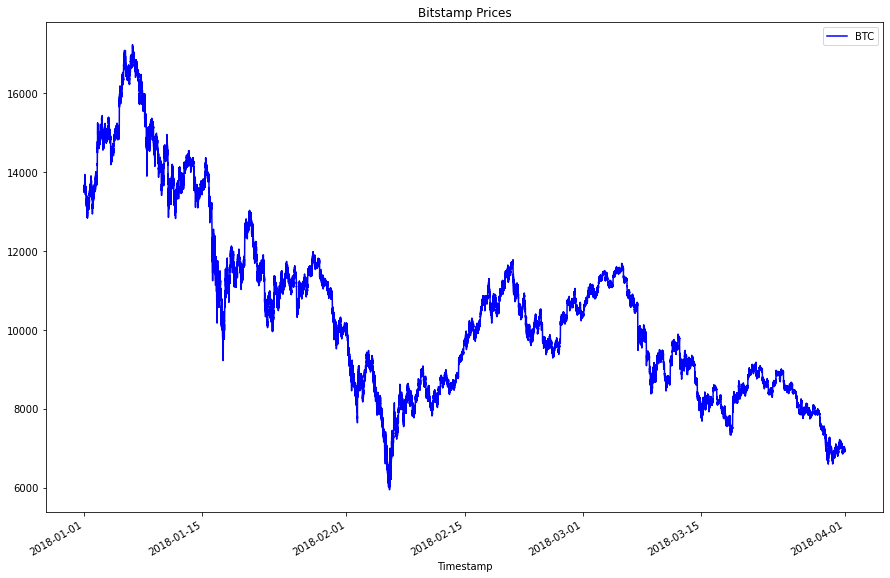

In [89]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(legend= True, figsize= (15,10), title= "Bitstamp Prices", color= "blue", label= "BTC")

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

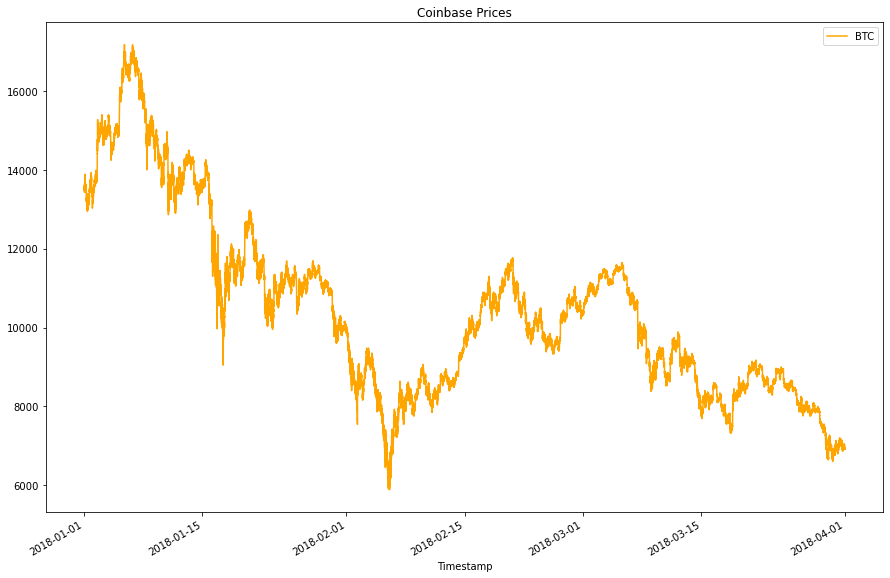

In [90]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(legend= True, figsize= (15,10), title= "Coinbase Prices", color= "orange", label= "BTC")

<AxesSubplot:title={'center':'Bitstamp Vs Coinbase Prices'}, xlabel='Timestamp'>

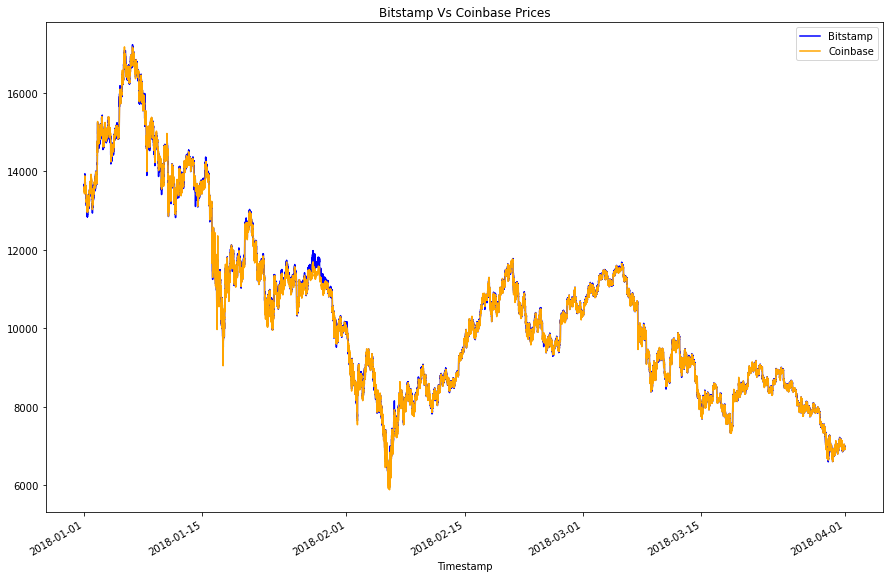

In [91]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend= True, figsize= (15,10), title= "Bitstamp Vs Coinbase Prices", color= "blue", label= "Bitstamp")
coinbase_sliced.plot(legend= True, figsize= (15,10), color= "orange", label= "Coinbase")

<AxesSubplot:title={'center':'Bitstamp Vs Coinbase Prices in January 2018'}, xlabel='Timestamp'>

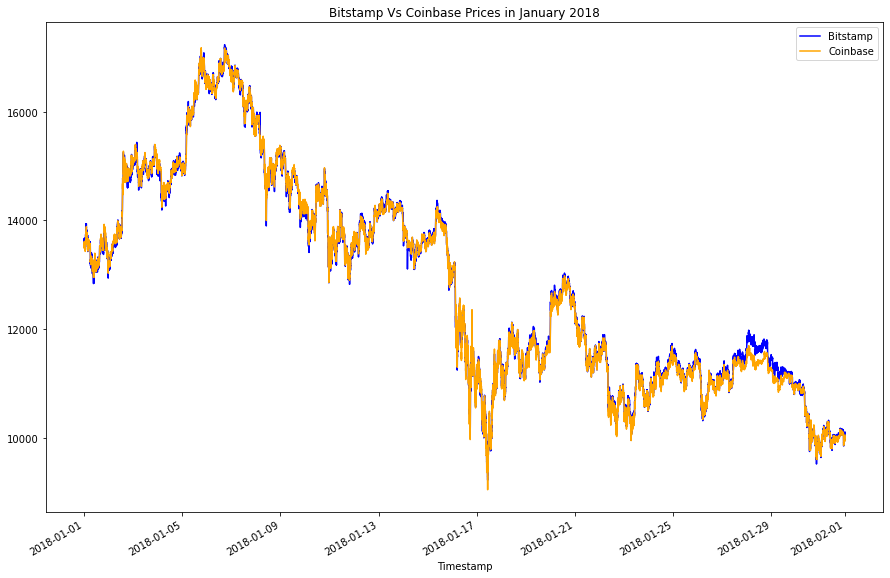

In [92]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018.01.01':'2018.01.31'].plot(legend= True, figsize= (15,10), title= "Bitstamp Vs Coinbase Prices in January 2018", color= "blue", label= "Bitstamp")
coinbase_sliced.loc['2018.01.01':'2018.01.31'].plot(legend= True, figsize= (15,10), color= "orange", label= "Coinbase")

<AxesSubplot:title={'center':'Bitstamp Vs Coinbase Prices in March 2018'}, xlabel='Timestamp'>

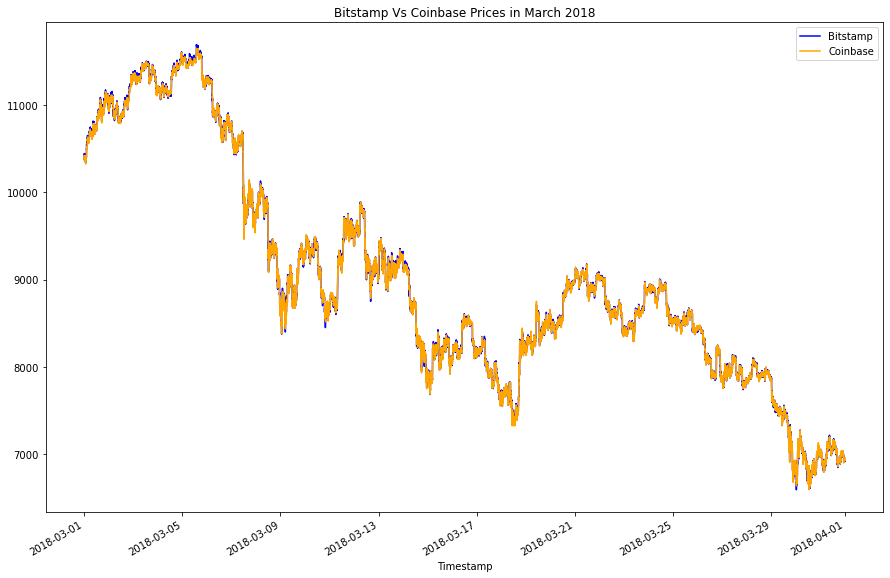

In [93]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018.03.01':'2018.03.31'].plot(legend= True, figsize= (15,10), title= "Bitstamp Vs Coinbase Prices in March 2018", color= "blue", label= "Bitstamp")
coinbase_sliced.loc['2018.03.01':'2018.03.31'].plot(legend= True, figsize= (15,10), color= "orange", label= "Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** It is hard to see the diffenrece in price for each exchanges for the one month period as there is a lot of data taken for each month. It would be better to slice the period over one week or even one day. As of the result from the one month data, there is not enough differences to make a concrete choice. There is too much overlap of each color on the graphs. It is pretty much impossibe to evaluate the degree of spread. Both exchanges alternate on witch one gets higher and lower prices. Bitstamp had a few periods when the price was sinificantly higher. But not enough to make a definitive decision. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp Vs Coinbase Prices on January 5, 2018'}, xlabel='Timestamp'>

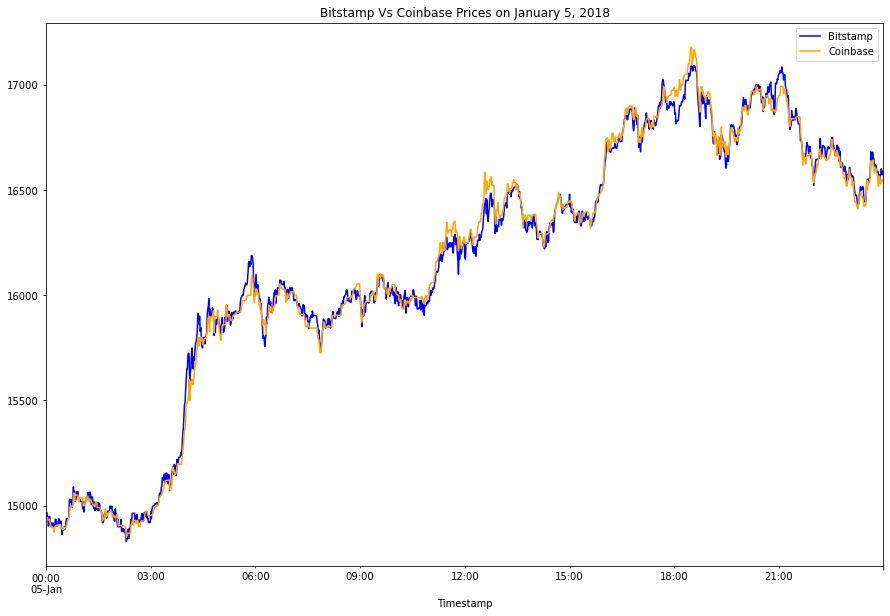

In [94]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018.01.05'].plot(legend= True, figsize= (15,10),
                                       title= "Bitstamp Vs Coinbase Prices on January 5, 2018", color= "blue", label= "Bitstamp")
coinbase_sliced.loc['2018.01.05'].plot(legend= True, figsize= (15,10), color= "orange", label= "Coinbase")

In [95]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced.loc['2018.01.05'] - bitstamp_sliced.loc['2018.01.05'] 

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean        0.650535
std        44.027768
min      -216.930000
25%       -24.477500
50%        -0.055000
75%        26.000000
max       150.850000
Name: Close, dtype: float64

<AxesSubplot:>

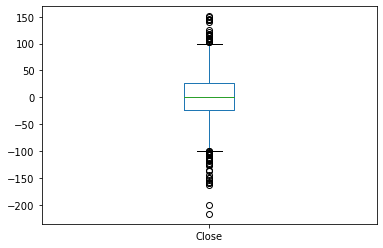

In [96]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box")

<AxesSubplot:title={'center':'Bitstamp Vs Coinbase Prices on February 10, 2018'}, xlabel='Timestamp'>

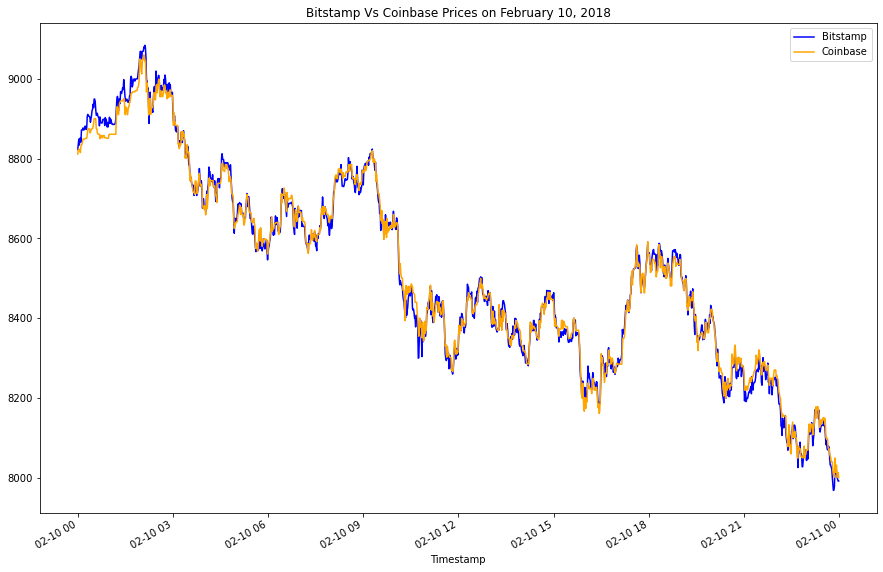

In [102]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018.02.10'].plot(legend= True, figsize= (15,10),
                                       title= "Bitstamp Vs Coinbase Prices on February 10, 2018", color= "blue", label= "Bitstamp")
coinbase_sliced.loc['2018.02.10'].plot(legend= True, figsize= (15,10), color= "orange", label= "Coinbase")

In [103]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc['2018.02.10'] - bitstamp_sliced.loc['2018.02.10'] 

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1436.000000
mean       -0.364930
std        18.745766
min       -56.130000
25%       -12.657500
50%         0.010000
75%        12.180000
max        74.540000
Name: Close, dtype: float64

<AxesSubplot:>

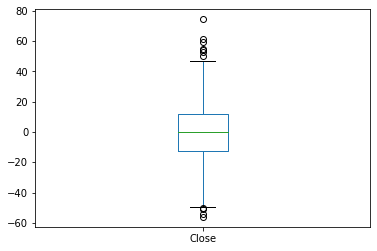

In [104]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind="box")

<AxesSubplot:title={'center':'Bitstamp Vs Coinbase Prices on March 25, 2018'}, xlabel='Timestamp'>

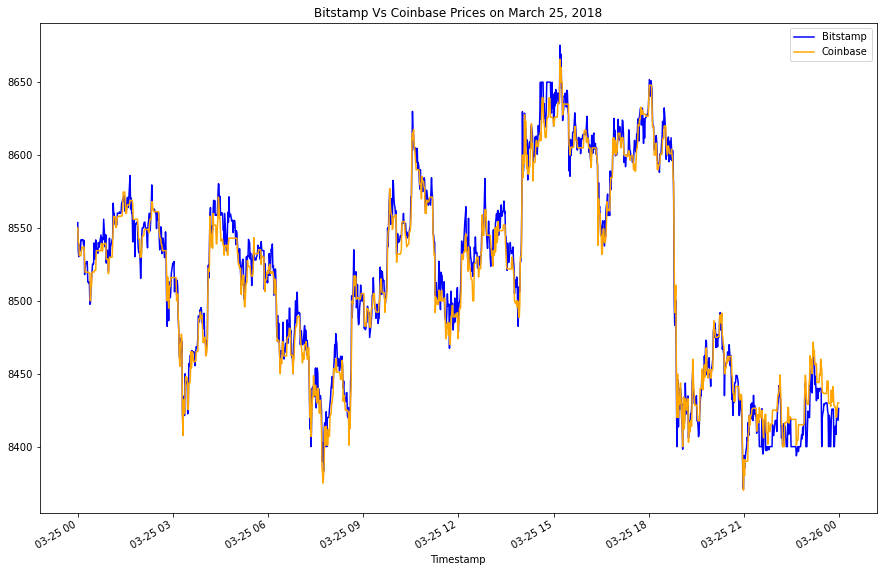

In [105]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018.03.25'].plot(legend= True, figsize= (15,10),
                                       title= "Bitstamp Vs Coinbase Prices on March 25, 2018",
                                       color= "blue", label= "Bitstamp")
coinbase_sliced.loc['2018.03.25'].plot(legend= True, figsize= (15,10), color= "orange", label= "Coinbase")

In [107]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced.loc['2018.03.25'] - bitstamp_sliced.loc['2018.03.25'] 

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1404.000000
mean       -2.294423
std         9.853020
min       -34.640000
25%        -8.810000
50%        -2.805000
75%         3.767500
max        53.940000
Name: Close, dtype: float64

<AxesSubplot:>

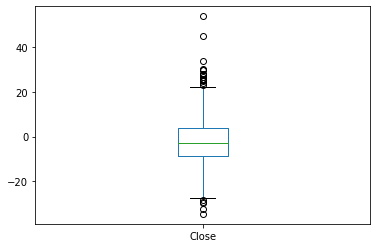

In [108]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind="box")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [109]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced.loc['2018.01.05'] -  bitstamp_sliced.loc['2018.01.05'] 

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
summary_stat_early = arbitrage_spread_early[arbitrage_spread_early >0]

summary_stat_early.describe()

count    714.000000
mean      33.780714
std       28.724107
min        0.010000
25%       12.642500
50%       26.140000
75%       47.850000
max      150.850000
Name: Close, dtype: float64

In [110]:
# For the date in the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase_sliced.loc['2018.02.10'] - bitstamp_sliced.loc['2018.02.10'] 

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
summary_stat_middle = arbitrage_spread_middle[arbitrage_spread_middle >0]

summary_stat_middle.describe()

count    722.000000
mean      14.539224
std       10.859855
min        0.010000
25%        6.042500
50%       12.170000
75%       20.652500
max       74.540000
Name: Close, dtype: float64

In [111]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = coinbase_sliced.loc['2018.03.25'] - bitstamp_sliced.loc['2018.03.25'] 

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
summary_stat_late = arbitrage_spread_late[arbitrage_spread_late >0]

summary_stat_late.describe()

count    540.000000
mean       7.356963
std        6.785546
min        0.010000
25%        2.530000
50%        5.430000
75%        9.945000
max       53.940000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [112]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= summary_stat_early / bitstamp_sliced.loc['2018.01.05']
spread_return_middle= summary_stat_middle / bitstamp_sliced.loc['2018.02.10']
spread_return_late= summary_stat_late / bitstamp_sliced.loc['2018.03.25']

# Review the spread return DataFrame
display(spread_return_early)
display(spread_return_middle)
display(spread_return_late)


Timestamp
2018-01-05 00:00:00         NaN
2018-01-05 00:01:00         NaN
2018-01-05 00:02:00         NaN
2018-01-05 00:03:00         NaN
2018-01-05 00:04:00    0.001954
                         ...   
2018-01-05 23:55:00         NaN
2018-01-05 23:56:00         NaN
2018-01-05 23:57:00         NaN
2018-01-05 23:58:00         NaN
2018-01-05 23:59:00         NaN
Name: Close, Length: 1440, dtype: float64

Timestamp
2018-02-10 00:00:00         NaN
2018-02-10 00:01:00         NaN
2018-02-10 00:02:00         NaN
2018-02-10 00:03:00         NaN
2018-02-10 00:04:00         NaN
                         ...   
2018-02-10 23:54:00    0.000070
2018-02-10 23:56:00    0.000139
2018-02-10 23:57:00    0.000469
2018-02-10 23:58:00    0.002610
2018-02-10 23:59:00    0.001111
Name: Close, Length: 1436, dtype: float64

Timestamp
2018-03-25 00:00:00         NaN
2018-03-25 00:01:00    0.000704
2018-03-25 00:02:00    0.001134
2018-03-25 00:03:00         NaN
2018-03-25 00:04:00         NaN
                         ...   
2018-03-25 23:55:00         NaN
2018-03-25 23:56:00         NaN
2018-03-25 23:57:00    0.001002
2018-03-25 23:58:00    0.001423
2018-03-25 23:59:00    0.000450
Name: Close, Length: 1406, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [124]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .001]
profitable_trades_middle = spread_return_middle[spread_return_middle > .001]
profitable_trades_late = spread_return_late[spread_return_late > .001]
# Review the first five profitable trades
display(profitable_trades_early.head())
display(profitable_trades_middle.head())
display(profitable_trades_late.head())

Timestamp
2018-01-05 00:04:00    0.001954
2018-01-05 00:27:00    0.001831
2018-01-05 00:48:00    0.001922
2018-01-05 00:50:00    0.002247
2018-01-05 00:51:00    0.001399
Name: Close, dtype: float64

Timestamp
2018-02-10 02:15:00    0.002894
2018-02-10 02:22:00    0.001567
2018-02-10 03:00:00    0.002580
2018-02-10 03:02:00    0.002083
2018-02-10 03:05:00    0.001488
Name: Close, dtype: float64

Timestamp
2018-03-25 00:02:00    0.001134
2018-03-25 00:13:00    0.001053
2018-03-25 00:23:00    0.002517
2018-03-25 01:29:00    0.001517
2018-03-25 01:42:00    0.001043
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [125]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    486.000000
mean       0.002810
std        0.001630
min        0.001003
25%        0.001583
50%        0.002280
75%        0.003678
max        0.009226
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [126]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced.loc['2018.01.05'] 

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-05 00:04:00    29.176898
2018-01-05 00:27:00    27.259815
2018-01-05 00:48:00    28.945525
2018-01-05 00:50:00    33.825831
2018-01-05 00:51:00    21.059427
                         ...    
2018-01-05 21:56:00    19.673197
2018-01-05 22:09:00    19.232163
2018-01-05 22:44:00    25.850047
2018-01-05 22:47:00    20.946350
2018-01-05 22:59:00    24.004721
Name: Close, Length: 486, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [127]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    486.000000
mean      46.183431
std       27.289532
min       15.005041
25%       25.789324
50%       36.888295
75%       60.182063
max      152.241702
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

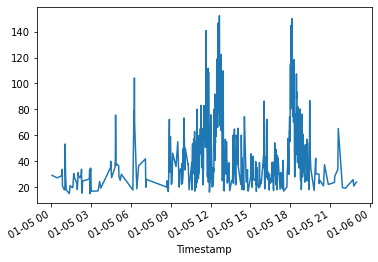

In [128]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot()

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [129]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

22445.14749320665

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [130]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early

Timestamp
2018-01-05 00:04:00       29.176898
2018-01-05 00:27:00       56.436713
2018-01-05 00:48:00       85.382238
2018-01-05 00:50:00      119.208069
2018-01-05 00:51:00      140.267497
                           ...     
2018-01-05 21:56:00    22355.114212
2018-01-05 22:09:00    22374.346375
2018-01-05 22:44:00    22400.196422
2018-01-05 22:47:00    22421.142772
2018-01-05 22:59:00    22445.147493
Name: Close, Length: 486, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

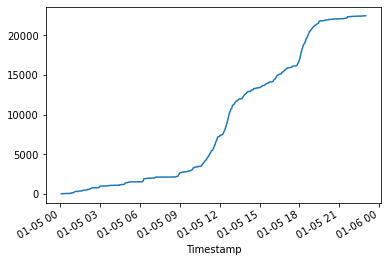

In [131]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot()

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE